# 1. Chargement des données

In [532]:
import pandas as pd

# Charger le jeu de données
df = pd.read_csv("dataDiabète.csv")

# Aperçu de la structure
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0           0            6      148             72             35        0   
1           1            1       85             66             29        0   
2

In [537]:
df = df.drop('Unnamed: 0', axis=1)

le df après la suppression de la colonne Unnamed

# 2. Analyse exploratoire des données (EDA)

**2.1 Vérification des dimensions et types**

In [533]:
print("Dimensions :", df.shape)
print("Types de données :", df.dtypes)

Dimensions : (768, 9)
Types de données : Unnamed: 0                    int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object


**2.2 Valeurs manquantes**

In [534]:
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())

Valeurs manquantes par colonne :
Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


aucun valeurs manquantes

**2.3 Doublons**

In [535]:
print("Nombre de doublons :", df.duplicated().sum())

Nombre de doublons : 0


**2.4 Distribution des variables numériques**

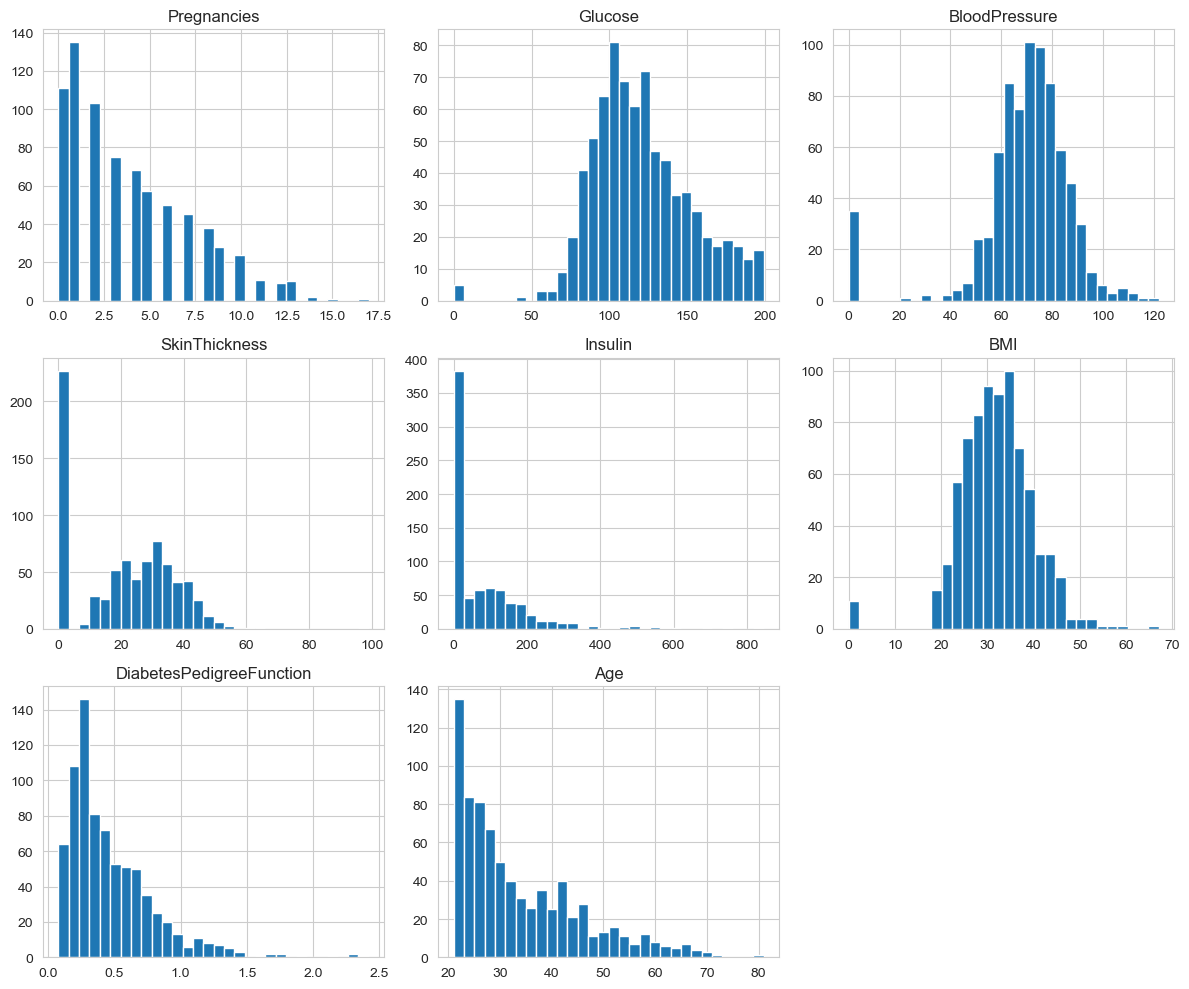

In [538]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()


**2.5 Corrélation entre variables**

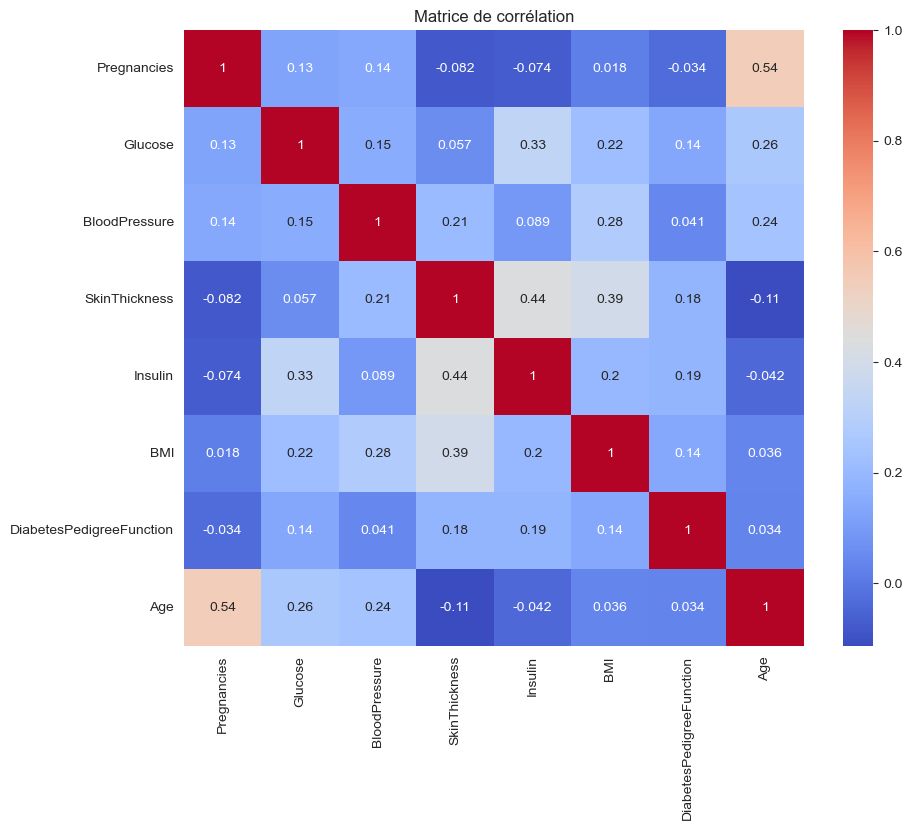

In [539]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()


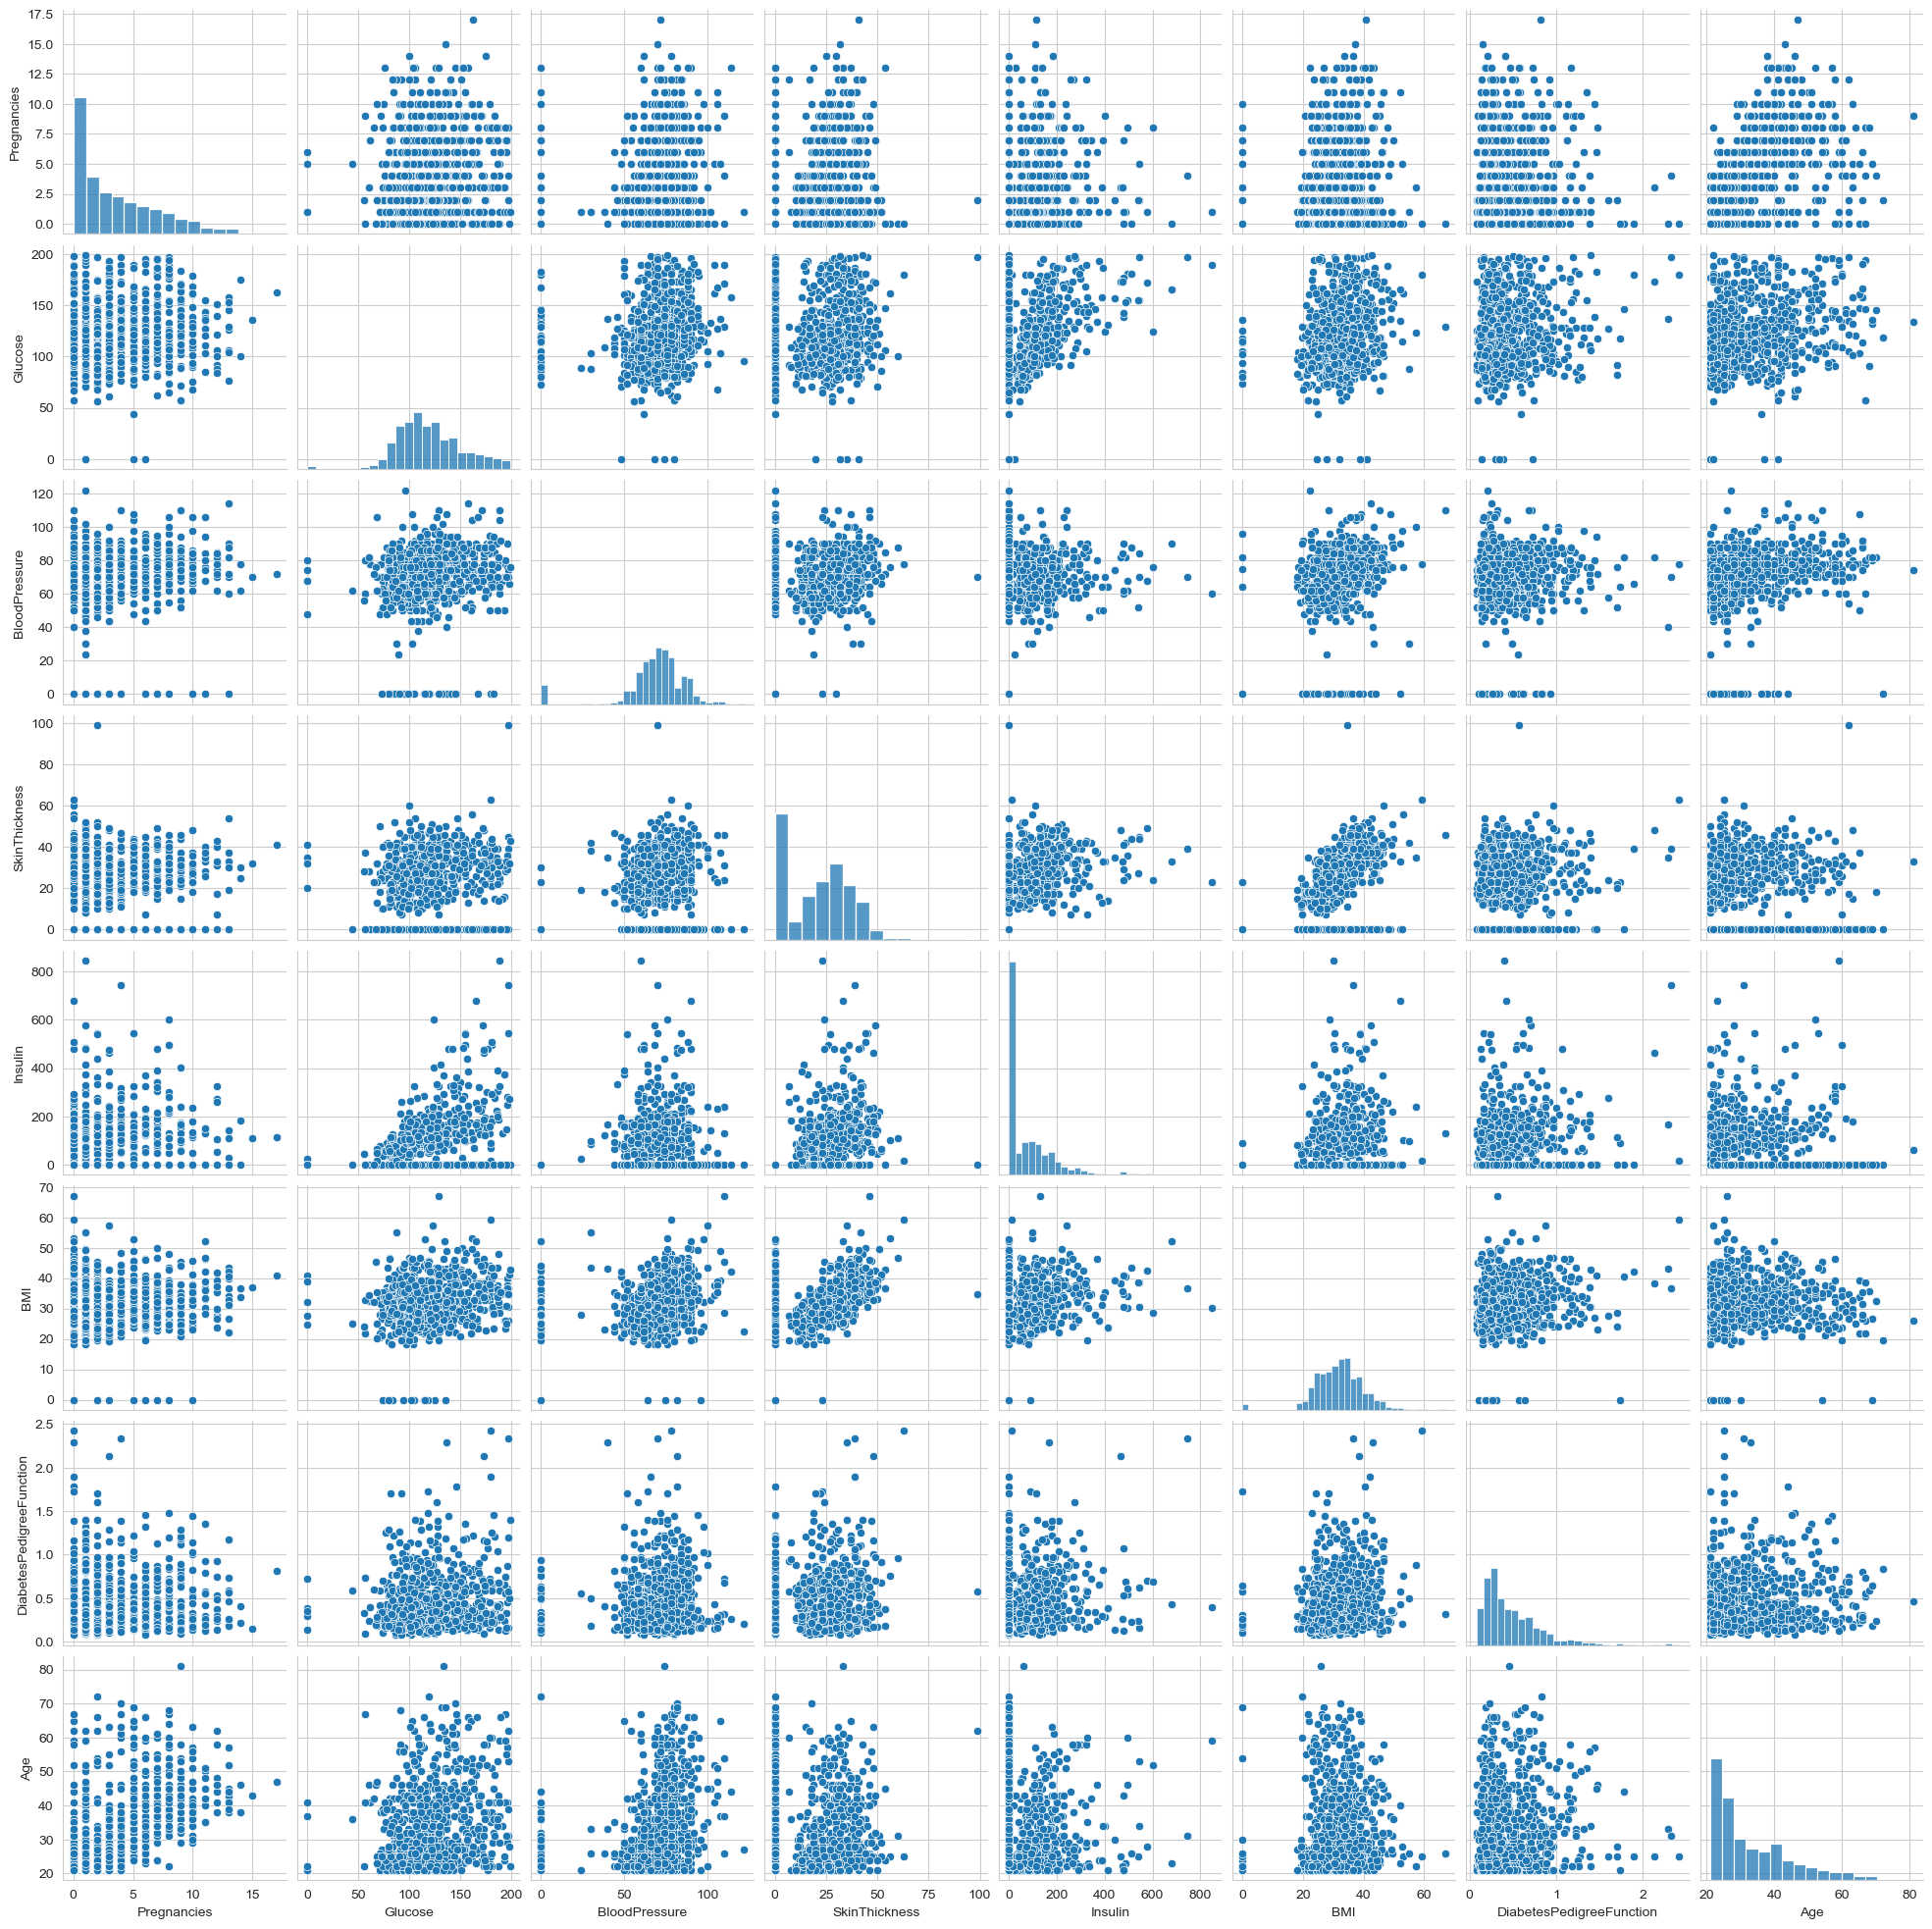

In [540]:
sns.pairplot(df)
plt.show()

# 3. Prétraitement des données

**3.1 Gestion des valeurs manquantes**


rien a supp puisqu'il n'existe plus

**3.2 Détection et suppression des valeurs aberrantes**

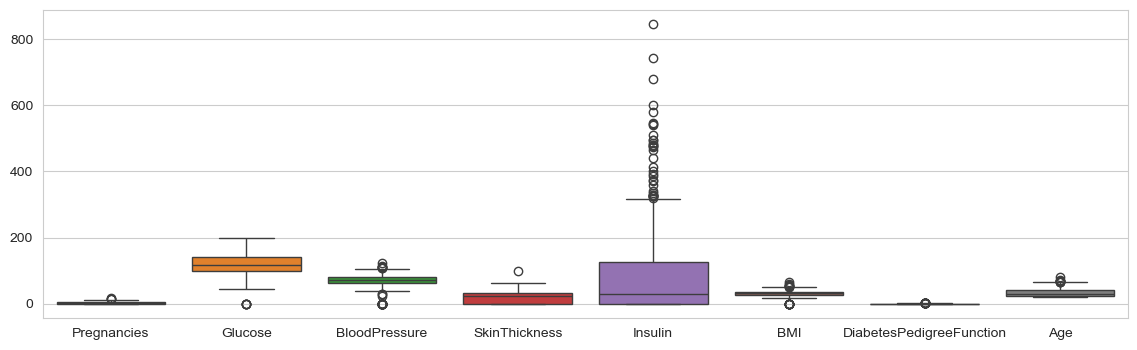

In [541]:
#boîte à moustaches
plt.figure(figsize=(14, 4))
sns.boxplot(df)
plt.show()

Ces graphiques sont excellents pour visualiser la distribution, la dispersion et la présence de valeurs aberrantes (outliers) dans chaque variable.

- Pregnancies (Grossesses) Distribution : Très concentrée vers des valeurs faibles (0-5 environ). La médiane semble être autour de 1-2.
- Glucose (Glucose) Distribution : La boîte est large, indiquant une bonne dispersion. La médiane est autour de 110-120
- BloodPressure (Tension Artérielle) Distribution : La médiane est autour de 70-75. La boîte est de taille moyenne
- SkinThickness (Épaisseur de la Peau) Distribution : Médiane autour de 20-25. La boîte est de taille moyenne
- BMI (Indice de Masse Corporelle) Distribution : La médiane est autour de 30-35. La boîte est de taille moyenne.

In [520]:
#IQR
for colom in df.columns:
    Q1 = df[colom].quantile(0.25)
    Q3 = df[colom].quantile(0.75)
    IQR = Q3 - Q1
    Borne_min = Q1 - 1.5 * IQR
    Borne_max = Q3 + 1.5 * IQR
    df = df[(df[colom] >= Borne_min) & (df[colom] <= Borne_max)]

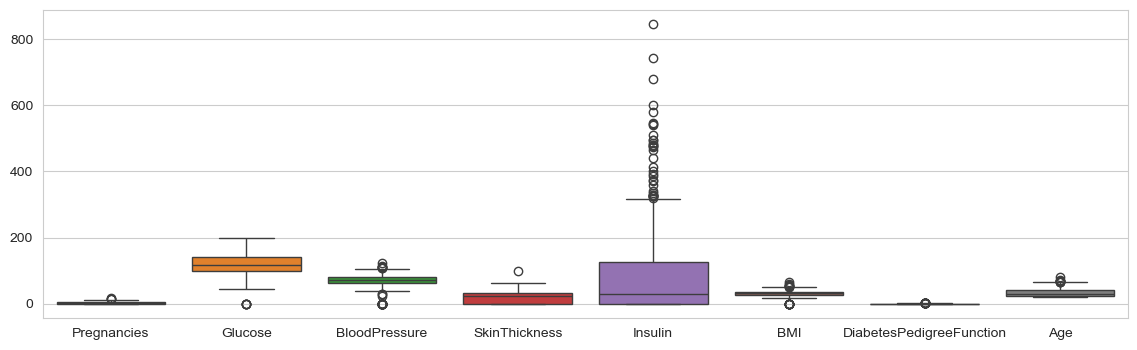

In [542]:
#boîte à moustaches
plt.figure(figsize=(14, 4))
sns.boxplot(df)
plt.show()

In [544]:
variance_by_column = df.var()
print("\n--- Variance de chaque variable numérique ---")
print(variance_by_column)


--- Variance de chaque variable numérique ---
Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
dtype: float64


Une forte variance indique que les points de données sont très éloignés de la moyenne et les uns des autres, tandis qu'une faible variance indique qu'ils sont groupés autour de la moyenne.

- Insulin (très élevé) : Confirme la forte dispersion et la présence d'outliers. Nécessitera très probablement une mise à l'échelle et potentiellement une transformation pour les modèles

- Glucose, SkinThickness, BloodPressure, Age : Ont des variances plus élevées qui justifient également une mise à l'échelle pour la plupart des algorithmes de machine learning afin d'éviter qu'elles ne dominent le processus d'apprentissage.

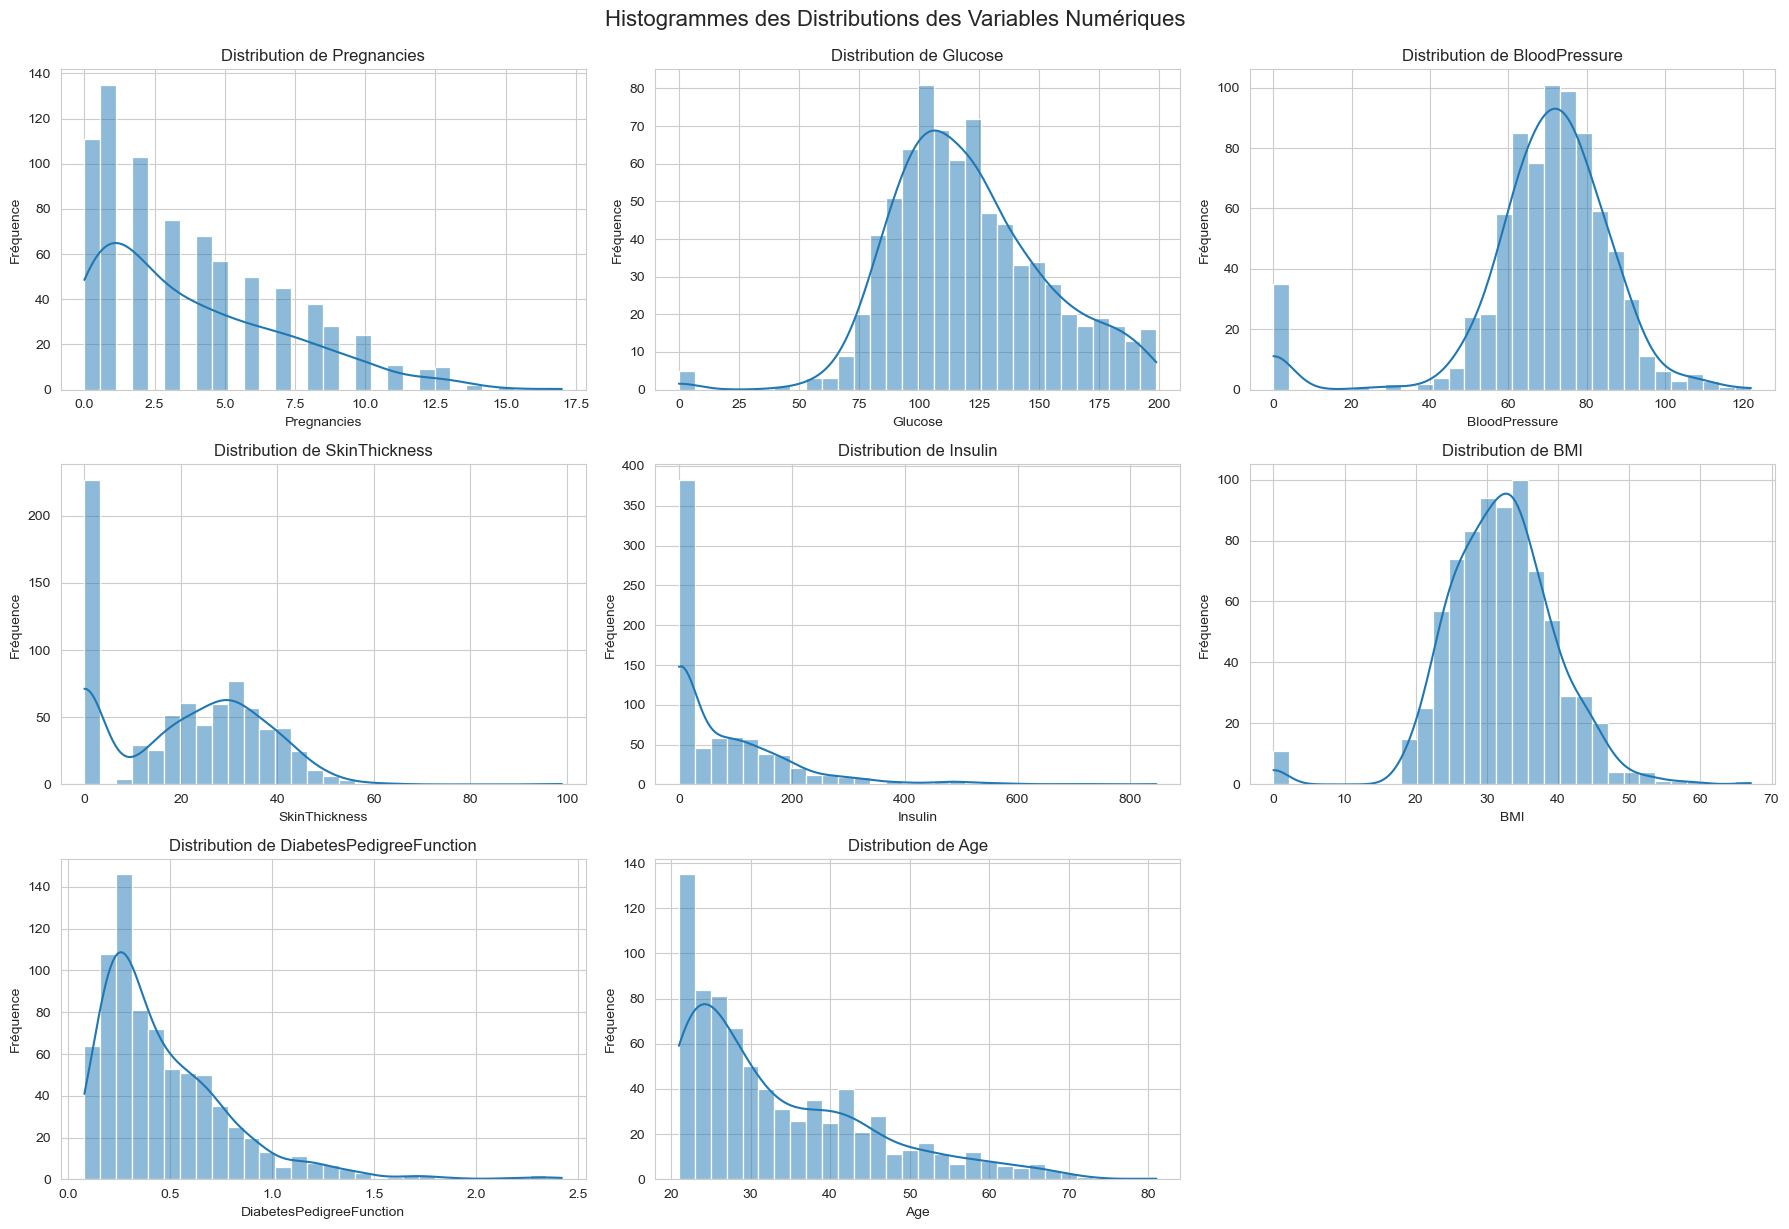

In [545]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid") # (optionnel, pour une meilleure esthétique)
num_cols = df.select_dtypes(include=np.number).shape[1]
n_rows = (num_cols + 2) // 3 # Arrondi supérieur pour avoir assez de lignes (3 colonnes par ligne)
n_cols = 3 # Affichons 3 histogrammes par ligne
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4)) # Taille de la figure globale
axes = axes.flatten() # Aplatir le tableau d'axes pour itérer facilement

# Boucler sur chaque colonne numérique du DataFrame
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    if i < len(axes): # S'assurer que nous ne dépassons pas le nombre d'axes disponibles
        sns.histplot(df[col], kde=True, ax=axes[i], bins=30) # kde=True ajoute une estimation de densité de noyau
        axes[i].set_title(f'Distribution de {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Fréquence')

# Supprimer les axes vides si le nombre de sous-graphiques n'est pas un multiple de n_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Ajuster l'agencement pour éviter les chevauchements
plt.suptitle('Histogrammes des Distributions des Variables Numériques', y=1.02, fontsize=16) # Titre général
plt.show()


Ces histogrammes montrent la distribution de chaque variable après nettoyage et imputation. On observe des asymétries notables (Insulin, DiabetesPedigreeFunction) et des échelles variables, nécessitant une attention particulière pour la mise à l'échelle et d'éventuelles transformations avant la modélisation.

**4. Sélection des variables pour le clustering**

In [547]:
features = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']
df_selected = df[features]

In [548]:
df_selected

,Glucose,BMI,Age,DiabetesPedigreeFunction
0,148,33.6,50,0.627
1,85,26.6,31,0.351
2,183,23.3,32,0.672
3,89,28.1,21,0.167
4,137,43.1,33,2.288
...,...,...,...,...
763,101,32.9,63,0.171
764,122,36.8,27,0.340
765,121,26.2,30,0.245
766,126,30.1,47,0.349


**5. Visualisation des relations entre variables**

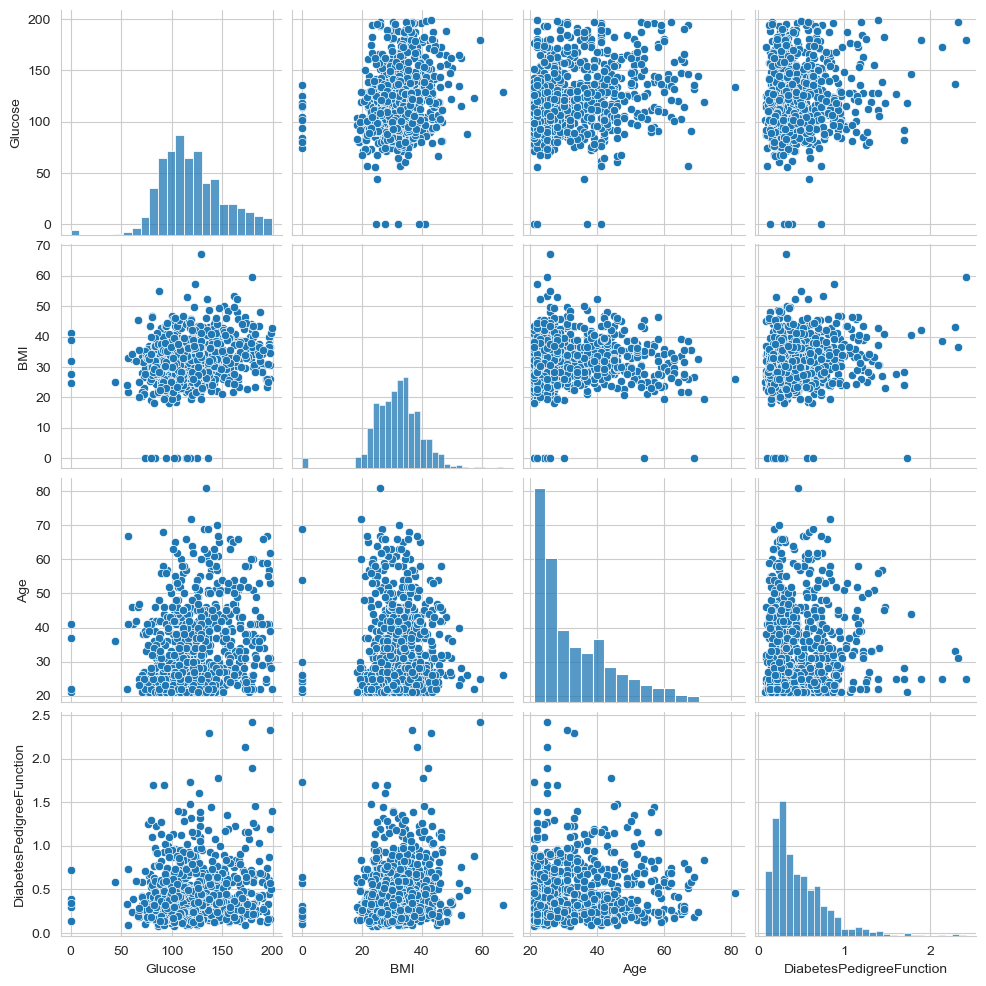

In [549]:
sns.pairplot(df_selected)
plt.show()

**6. Mise à l’échelle des variables**

In [575]:
from sklearn.preprocessing import StandardScaler
import joblib


clustering_cols = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']
df_clustering = df[clustering_cols].copy()

# Initialiser le StandardScaler
scaler = StandardScaler()

# C'est ici que le scaler "apprend" les statistiques (moyenne, écart-type) de vos données.
X_scaled = scaler.fit_transform(df_clustering)

# Convertir le tableau NumPy mis à l'échelle en DataFrame (facultatif pour le scaler)
X_scaled = pd.DataFrame(X_scaled, columns=clustering_cols)

# --- TRÈS IMPORTANT : SAUVEGARDEZ L'OBJET SCALER ENTRAÎNÉ ---
joblib.dump(scaler, 'scaler.pkl')
print("Scaler sauvegardé sous scaler.pkl")


Scaler sauvegardé sous scaler.pkl


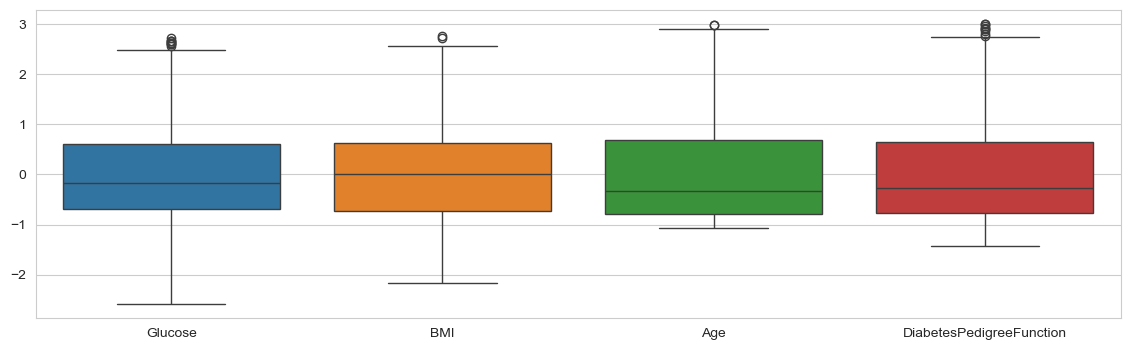

In [576]:
#boîte à moustaches
plt.figure(figsize=(14, 4))
sns.boxplot(X_scaled)
plt.show()

In [577]:
X_scaled

,Glucose,BMI,Age,DiabetesPedigreeFunction
0,1.005403,0.256438,1.604688,0.819791
1,-1.168963,-0.840893,-0.143041,-0.307223
2,2.213384,-1.358207,-0.051055,1.003543
3,-1.030908,-0.605751,-1.062898,-1.058566
4,-0.099037,-0.997655,-0.235026,-0.919731
...,...,...,...,...
631,-0.616743,0.146705,2.800503,-1.042232
632,0.108045,0.758076,-0.510984,-0.352141
633,0.073532,-0.903598,-0.235026,-0.740062
634,0.246100,-0.292227,1.328731,-0.315390


Échelle Homogène : Toutes les variables (Glucose, BMI, Age, DiabetesPedigreeFunction, et toute autre colonne standardisée) sont maintenant sur la même échelle. Leurs valeurs varient généralement entre -3 et +3 (environ) avec une moyenne de 0 et un écart-type de 1


# 6. clustering K-Means

In [563]:
from sklearn.cluster import KMeans

In [579]:
import os
os.environ["OMP_NUM_THREADS"] = "3"  # 1, 2 ou 3
from sklearn.cluster import KMeans

**6. Détermination de la valeur optimale de k (méthode du coude)**

In [607]:
inertias = []  # liste pour stocker l'inertie pour chaque k

k_range = range(1, 8)  # on teste les valeurs de k de 1 à 8

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)  # inertie = somme des distances intra-cluster

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

📌 L'avertissement signale que l'implémentation de KMeans dans scikit-learn peut présenter une "fuite de mémoire" (memory leak) sur les systèmes d'exploitation Windows, surtout lorsqu'elle utilise la bibliothèque MKL (Math Kernel Library) d'Intel.

**6.2 Tracer la courbe du coude**

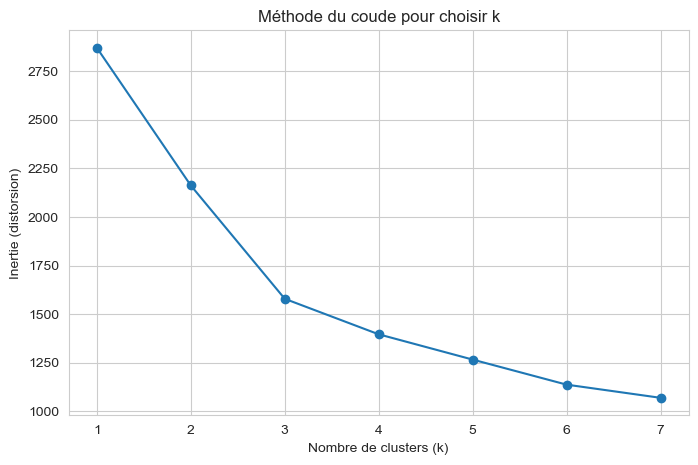

In [608]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title("Méthode du coude pour choisir k")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie (distorsion)")
plt.grid(True)
plt.show()

L'inertie, aussi appelée somme des carrés des erreurs intra-cluster (WCSS - Within-Cluster Sum of Squares), mesure la dispersion des points de données à l'intérieur de leurs clusters respectifs. Plus l'inertie est faible, plus les points sont proches des centroïdes de leurs clusters, et donc plus les clusters sont "compacts".

--> Le but de la méthode du coude est de trouver le point sur la courbe où la diminution de l'inertie commence à ralentir de manière significative, formant un "coude" ou une "cassure" distincte. Au-delà de ce point, ajouter plus de clusters n'apporte plus un gain substantiel en termes de réduction de l'inertie.

**6.3 Entraînement du modèle K-Means avec le k optimal**

In [609]:
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


**6.4 Ajouter une colonne Cluster au dataset original**

In [610]:
X_scaled['Cluster'] = clusters

**6.5 Visualiser la répartition des observations par cluster**

In [611]:
print(X_scaled['Cluster'].value_counts())

Cluster
1    309
0    168
2    159
Name: count, dtype: int64


Cette sortie est un peu ambigüe en termes de format, mais elle indique une répartition des observations dans différents clusters.

C:\Users\PC\AppData\Local\Temp\ipykernel_7208\2210925354.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


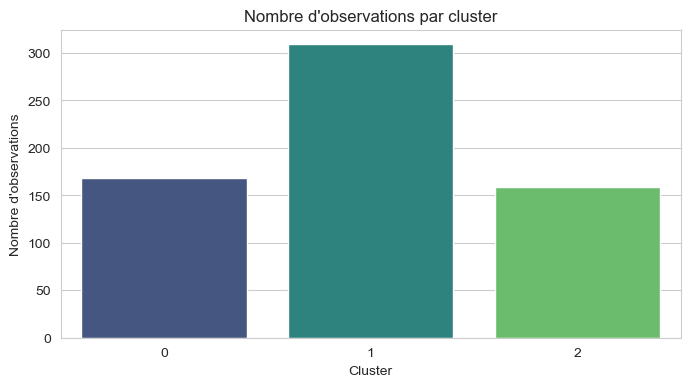

In [612]:
import matplotlib.pyplot as plt
import seaborn as sns

cluster_counts = pd.Series(kmeans.labels_).value_counts().sort_index()

# Visualisation
plt.figure(figsize=(8, 4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
plt.title("Nombre d'observations par cluster")
plt.xlabel("Cluster")
plt.ylabel("Nombre d'observations")
plt.show()

affichage des distrubution des clustre

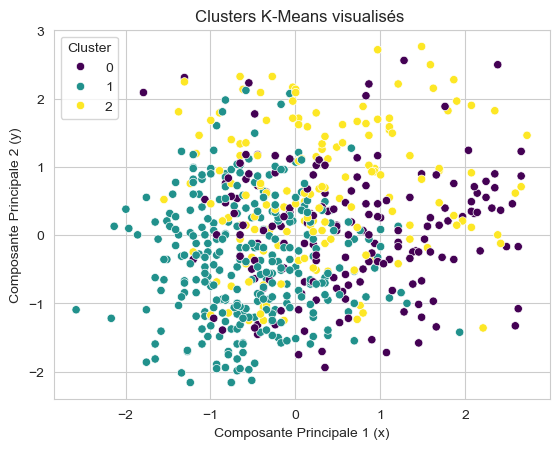

In [613]:
sns.scatterplot(x=X_scaled.iloc[:, 0], y=X_scaled.iloc[:, 1], hue=X_scaled['Cluster'], palette='viridis')
plt.title('Clusters K-Means visualisés ')
plt.xlabel('Composante Principale 1 (x)')
plt.ylabel('Composante Principale 2 (y)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# 7 Réduction de dimensionnalité pour visualisation

**7.1 Appliquer l’ACP (PCA) pour réduire les dimensions à 3 axes.**

In [614]:
print(X_scaled.columns)
X_scaled.head(10)

Index(['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Cluster'], dtype='object')


,Glucose,BMI,Age,DiabetesPedigreeFunction,Cluster
0,1.005403,0.256438,1.604688,0.819791,0
1,-1.168963,-0.840893,-0.143041,-0.307223,1
2,2.213384,-1.358207,-0.051055,1.003543,2
3,-1.030908,-0.605751,-1.062898,-1.058566,1
4,-0.099037,-0.997655,-0.235026,-0.919731,1
5,-1.410559,-0.151142,-0.602969,-0.727812,1
6,-0.306120,0.883485,-0.235026,-0.960565,1
7,1.695677,0.946190,0.132917,0.452286,2
8,1.626650,-0.966303,1.696674,0.656455,0
9,-0.030010,2.168931,-0.143041,0.509454,2


In [615]:
from sklearn.decomposition import PCA

# Appliquer PCA pour réduire les dimensions à 3 axes
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_scaled)

# Créer un DataFrame pour les composants principaux
df_pca = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2', 'PC3'])

print("\nDataFrame PCA avec les trois premières composantes principales et les clusters :")
print(df_pca.head(10))

print(f"\nVariance expliquée par les trois premières composantes principales : {pca.explained_variance_ratio_.sum()*100:.2f}%")


DataFrame PCA avec les trois premières composantes principales et les clusters :
        PC1       PC2       PC3
0  1.898067  0.748638 -0.881143
1 -0.791435 -1.069592 -0.454252
2  0.351495  0.968992 -1.228395
3 -1.142277 -1.431716  0.565506
4 -0.152798 -1.218429 -0.026620
5 -1.047473 -1.055008  0.426024
6  0.004100 -0.237493  1.224694
7  0.636839  1.761024  0.491118
8  2.167863  0.149310 -1.563499
9 -0.339504  1.919017  1.184860

Variance expliquée par les trois premières composantes principales : 81.27%


**7.2 Réentraîner le modèle K-Means sur les nouvelles dimensions**

In [616]:
# Réentraîner K-Means sur les données PCA pour la visualisation
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_pca.fit(df_pca[['PC1', 'PC2', 'PC3' ]])

# Ajouter les nouveaux labels de cluster basés sur PCA au DataFrame PCA
df_pca['Cluster_PCA'] = kmeans_pca.labels_

print(f"\nModèle K-Means réentraîné sur les données PCA avec {3} clusters.")
print("Aperçu du DataFrame PCA avec les clusters recalculés :")
print(df_pca.head(10))


Modèle K-Means réentraîné sur les données PCA avec 3 clusters.
Aperçu du DataFrame PCA avec les clusters recalculés :
        PC1       PC2       PC3  Cluster_PCA
0  1.898067  0.748638 -0.881143            0
1 -0.791435 -1.069592 -0.454252            1
2  0.351495  0.968992 -1.228395            2
3 -1.142277 -1.431716  0.565506            1
4 -0.152798 -1.218429 -0.026620            1
5 -1.047473 -1.055008  0.426024            1
6  0.004100 -0.237493  1.224694            1
7  0.636839  1.761024  0.491118            2
8  2.167863  0.149310 -1.563499            0
9 -0.339504  1.919017  1.184860            2


c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


**7.3 Visualiser les clusters obtenus et analyser la distribution**

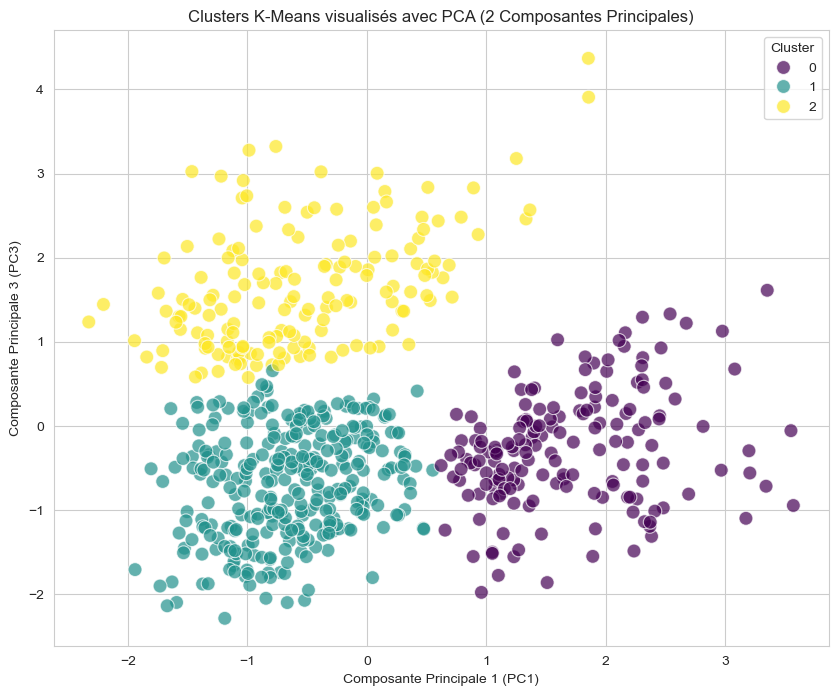


Le graphique ci-dessus montre la distribution des clusters dans l'espace PCA en 2D.


In [617]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_PCA', data=df_pca, palette='viridis', s=100, alpha=0.7)
plt.title('Clusters K-Means visualisés avec PCA (2 Composantes Principales)')
plt.xlabel('Composante Principale 1 (PC1)')
plt.ylabel('Composante Principale 2 (PC2)')
plt.ylabel('Composante Principale 3 (PC3)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

print("\nLe graphique ci-dessus montre la distribution des clusters dans l'espace PCA en 2D.")

**8 Analyse des clusters**

**8.1 Calculer les moyennes des caractéristiques au sein de chaque cluster**

In [620]:
df_reset = X_scaled.reset_index(drop=True)

df_analysis = pd.concat([df_reset[features].loc[df_pca.index], df_pca['Cluster_PCA']], axis=1).copy()
# Moyennes par cluster et Ajout d'une colonne de risque
cluster_means = df_analysis.groupby('Cluster_PCA')[features].mean()
df_analysis['risk_category'] = df_analysis['Cluster_PCA'].apply(lambda x: 1 if cluster_means.loc[x, 'Glucose'] > 126 and cluster_means.loc[x, 'BMI'] > 30 and cluster_means.loc[x, 'DiabetesPedigreeFunction'] > 0.5 else 0)


print(df_analysis['risk_category'].value_counts()) # Nombre par catégorie
print("\nMoyennes des caractéristiques par cluster :")
cluster_means = df_analysis.groupby('Cluster_PCA')[features].mean()
print(cluster_means)

risk_category
0    636
Name: count, dtype: int64

Moyennes des caractéristiques par cluster :
              Glucose       BMI       Age  DiabetesPedigreeFunction
Cluster_PCA                                                        
0            0.667250  0.068884  1.215392                 -0.382110
1           -0.522361 -0.366042 -0.572010                 -0.433650
2            0.310135  0.638582 -0.172546                  1.246492


D'après ces moyennes, il semble que notre clustering ait réussi à séparer au moins trois groupes distincts basés sur les caractéristiques que nous avons fournies :

- Un groupe (Cluster 0) avec des caractéristiques généralement "plus élevées" (âge, glucose, BMI, risque familial).
- Un autre groupe (Cluster 1) avec des caractéristiques généralement "plus basses" sur les mêmes dimensions.
- Un troisième groupe (Cluster 2) qui semble être un peu "intermédia

C'est une différenciation clinique très pertinente dans le contexte des facteurs de risque de diabète

**8.2 Compter le nombre d’observations par groupe**

In [621]:
print("\nNombre d'observations par cluster :")
cluster_counts = df_analysis['Cluster_PCA'].value_counts().sort_index()
print(cluster_counts)


Nombre d'observations par cluster :
Cluster_PCA
0    168
1    309
2    159
Name: count, dtype: int64


**8.3 Ajouter une colonne risk_category basée sur le numéro de cluster**

In [623]:
df_analysis['risk_category'] = df_analysis['Cluster_PCA'].apply(lambda x: 'High Risk' if x == 1 else 'Low Risk' )

print("\nDataFrame avec la nouvelle colonne 'risk_category':")
print(df_analysis[['Glucose', 'BMI', 'Age', 'Cluster_PCA', 'risk_category']].head())

print("\nRépartition des patients par catégorie de risque :")
print(df_analysis['risk_category'].value_counts())


DataFrame avec la nouvelle colonne 'risk_category':
    Glucose       BMI       Age  Cluster_PCA risk_category
0  1.005403  0.256438  1.604688            0      Low Risk
1 -1.168963 -0.840893 -0.143041            1     High Risk
2  2.213384 -1.358207 -0.051055            2      Low Risk
3 -1.030908 -0.605751 -1.062898            1     High Risk
4 -0.099037 -0.997655 -0.235026            1     High Risk

Répartition des patients par catégorie de risque :
risk_category
Low Risk     327
High Risk    309
Name: count, dtype: int64


C:\Users\PC\AppData\Local\Temp\ipykernel_7208\1074196940.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='risk_category', data=df_analysis, order=['Low Risk', 'High Risk'], palette={'Low Risk':'green', 'High Risk':'red'})


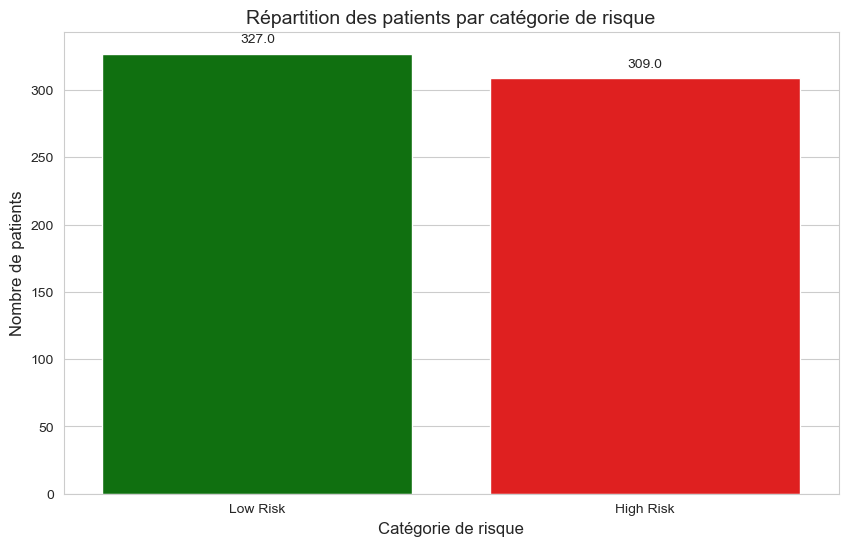

In [625]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création de l'histogramme
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='risk_category', data=df_analysis, order=['Low Risk', 'High Risk'], palette={'Low Risk':'green', 'High Risk':'red'})

# Ajout des annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Répartition des patients par catégorie de risque', fontsize=14)
plt.xlabel('Catégorie de risque', fontsize=12)
plt.ylabel('Nombre de patients', fontsize=12)
plt.show()

**Interprétation**

Répartition globale :

- Low Risk: 327 patients (51.4%)
- High Risk: 309 patients (48.6%)

Analyse :

- La distribution est presque équilibrée avec un léger avantage pour la catégorie "Low Risk"
- Cette quasi-parité suggère que votre modèle de classification a identifié deux populations distinctes Pour un problème médical, cette répartition semble réaliste (pas de déséquilibre extrême)

# 9 Préparation des données pour la classification

**9.1 Définir la variable cible y à partir de la colonne risk_category**

In [626]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

X = X_scaled.copy()
y = df_analysis['risk_category']

print(f"Forme de X : {X.shape}")
print(f"Forme de y : {y.shape}")
print("\nPremières lignes de y :")
print(y.head())

Forme de X : (636, 5)
Forme de y : (636,)

Premières lignes de y :
0     Low Risk
1    High Risk
2     Low Risk
3    High Risk
4    High Risk
Name: risk_category, dtype: object


**9.2 Diviser les données en ensemble d’entraînement et de test**

In [629]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nForme de X_train : {X_train.shape}")
print(f"Forme de X_test : {X_test.shape}")
print(f"Forme de y_train : {y_train.shape}")
print(f"Forme de y_test : {y_test.shape}")

print("\nRépartition des classes dans l'ensemble d'entraînement avant sur-échantillonnage :")
print(Counter(y_train))


Forme de X_train : (445, 5)
Forme de X_test : (191, 5)
Forme de y_train : (445,)
Forme de y_test : (191,)

Répartition des classes dans l'ensemble d'entraînement avant sur-échantillonnage :
Counter({'Low Risk': 229, 'High Risk': 216})


**9.3 Gérer le déséquilibre des classes avec des techniques de sur-échantillonnage**

In [630]:
# Gérer le déséquilibre des classes avec RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

print("\nRépartition des classes dans l'ensemble d'entraînement après sur-échantillonnage :")
print(Counter(y_train_resampled))


Répartition des classes dans l'ensemble d'entraînement après sur-échantillonnage :
Counter({'Low Risk': 229, 'High Risk': 229})


# Entraînement de plusieurs modèles de classification

Tester les algorithmes suivants :
- Random Forest
- Support Vector Machine (SVM)
- Gradient Boosting Decision Tree
- Régression Logistique

In [631]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np

# Initialiser les modèles
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True), 
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear')
}

# Dictionnaire pour stocker les résultats
results = {}

print("\n--- Entraînement et évaluation des modèles ---")
for name, model in models.items():
    print(f"\nEntraînement du modèle : {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    # Stocker les prédictions pour l'analyse ultérieure
    results[name] = {
        'model': model,
        'predictions': y_pred
    }

    # Évaluation de base
    print(f"Performance de {name} sur l'ensemble de test :")
    print(classification_report(y_test, y_pred))
    print(f"Matrice de confusion :\n{confusion_matrix(y_test, y_pred)}")

    # Calcul des métriques individuelles
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='High Risk') # Spécifier le label positif
    recall = recall_score(y_test, y_pred, pos_label='High Risk')
    f1 = f1_score(y_test, y_pred, pos_label='High Risk')

    results[name]['metrics'] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")


--- Entraînement et évaluation des modèles ---

Entraînement du modèle : Random Forest...
Performance de Random Forest sur l'ensemble de test :
              precision    recall  f1-score   support

   High Risk       1.00      1.00      1.00        93
    Low Risk       1.00      1.00      1.00        98

    accuracy                           1.00       191
   macro avg       1.00      1.00      1.00       191
weighted avg       1.00      1.00      1.00       191

Matrice de confusion :
[[93  0]
 [ 0 98]]
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-Score: 1.00

Entraînement du modèle : SVM...
Performance de SVM sur l'ensemble de test :
              precision    recall  f1-score   support

   High Risk       1.00      1.00      1.00        93
    Low Risk       1.00      1.00      1.00        98

    accuracy                           1.00       191
   macro avg       1.00      1.00      1.00       191
weighted avg       1.00      1.00      1.00       191

Matrice de confusion

👉 Tous les modèles sont très performants, mais trois d'entre eux classifient tous les patients correctement.

- Choisir Random Forest, SVM ou Gradient Boosting pour une prédiction optimale.
- Vérifier si le surapprentissage (overfitting) explique les performances parfaites :

1. Cross-validation pour confirmer la robustesse. 
2. Test sur de nouvelles données pour valider la généralisation.

- 📉 Si les données sont déséquilibrées, envisager un rééchantillonnage (SMOTE) pour la Régression Logistique.


**Validation croisée**

In [632]:
print("\n--- Validation croisée des modèles ---")
for name, model_data in results.items():
    model = model_data['model']

    cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1_weighted') # Utiliser f1_weighted pour le déséquilibre
    results[name]['cv_scores'] = cv_scores
    print(f"\n{name} - Scores de validation croisée (F1-score pondéré) :")
    print(f"Moyenne : {np.mean(cv_scores):.2f}, Écart-type : {np.std(cv_scores):.2f}")


--- Validation croisée des modèles ---

Random Forest - Scores de validation croisée (F1-score pondéré) :
Moyenne : 1.00, Écart-type : 0.00

SVM - Scores de validation croisée (F1-score pondéré) :
Moyenne : 1.00, Écart-type : 0.00

Gradient Boosting - Scores de validation croisée (F1-score pondéré) :
Moyenne : 1.00, Écart-type : 0.00

Logistic Regression - Scores de validation croisée (F1-score pondéré) :
Moyenne : 0.94, Écart-type : 0.03


👉 La validation croisée confirme que les 3 premiers modèles sont parfaitement stables, tandis que la régression logistique montre une légère fragilité.

- Aucune variation entre les folds → Très généralisables, pas de surapprentissage détecté.
- Idéaux pour un déploiement en production (prédictions fiables et cohérentes).


1. Random Forest, SVM et Gradient Boosting sont parfaits (F1-score = 1.00, stabilité absolue).
2. La régression logistique est bonne (0.94) mais moins fiable pour des applications critiques.
3. Aucun signe de surapprentissage → Les modèles généralisent parfaitement.

**Optimisation des hyperparamètres**

In [633]:
print("\n--- Optimisation des hyperparamètres avec GridSearchCV ---")

# Paramètres pour RandomForestClassifier
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=1)
print("\nRecherche des meilleurs hyperparamètres pour Random Forest...")
grid_search_rf.fit(X_train_resampled, y_train_resampled)
results['Random Forest']['best_model'] = grid_search_rf.best_estimator_
results['Random Forest']['best_params'] = grid_search_rf.best_params_
results['Random Forest']['best_score'] = grid_search_rf.best_score_
print(f"Meilleurs hyperparamètres pour Random Forest : {grid_search_rf.best_params_}")
print(f"Meilleur score F1 (validation) pour Random Forest : {grid_search_rf.best_score_:.4f}")

# Paramètres pour GradientBoostingClassifier
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=1)
print("\nRecherche des meilleurs hyperparamètres pour Gradient Boosting...")
grid_search_gb.fit(X_train_resampled, y_train_resampled)
results['Gradient Boosting']['best_model'] = grid_search_gb.best_estimator_
results['Gradient Boosting']['best_params'] = grid_search_gb.best_params_
results['Gradient Boosting']['best_score'] = grid_search_gb.best_score_
print(f"Meilleurs hyperparamètres pour Gradient Boosting : {grid_search_gb.best_params_}")
print(f"Meilleur score F1 (validation) pour Gradient Boosting : {grid_search_gb.best_score_:.4f}")

# Re-évaluer les modèles avec les meilleurs hyperparamètres sur l'ensemble de test
print("\n--- Évaluation des modèles avec hyperparamètres optimisés (sur l'ensemble de test) ---")
for name in ['Random Forest', 'Gradient Boosting']: # Seuls ceux que nous avons optimisés
    if 'best_model' in results[name]:
        best_model = results[name]['best_model']
        y_pred_tuned = best_model.predict(X_test)
        print(f"\nPerformance de {name} (optimisé) sur l'ensemble de test :")
        print(classification_report(y_test, y_pred_tuned))
        print(f"Matrice de confusion :\n{confusion_matrix(y_test, y_pred_tuned)}")
        results[name]['tuned_metrics'] = {
            'Accuracy': accuracy_score(y_test, y_pred_tuned),
            'Precision': precision_score(y_test, y_pred_tuned, pos_label='High Risk'),
            'Recall': recall_score(y_test, y_pred_tuned, pos_label='High Risk'),
            'F1-Score': f1_score(y_test, y_pred_tuned, pos_label='High Risk')
        }
        print(f"Accuracy: {results[name]['tuned_metrics']['Accuracy']:.4f}, Precision: {results[name]['tuned_metrics']['Precision']:.4f}, Recall: {results[name]['tuned_metrics']['Recall']:.4f}, F1-Score: {results[name]['tuned_metrics']['F1-Score']:.4f}")


--- Optimisation des hyperparamètres avec GridSearchCV ---

Recherche des meilleurs hyperparamètres pour Random Forest...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Meilleurs hyperparamètres pour Random Forest : {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Meilleur score F1 (validation) pour Random Forest : 1.0000

Recherche des meilleurs hyperparamètres pour Gradient Boosting...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Meilleurs hyperparamètres pour Gradient Boosting : {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Meilleur score F1 (validation) pour Gradient Boosting : 1.0000

--- Évaluation des modèles avec hyperparamètres optimisés (sur l'ensemble de test) ---

Performance de Random Forest (optimisé) sur l'ensemble de test :
              precision    recall  f1-score   support

   High Risk       1.00      1.00      1.00        93
    Low Risk       1.00      1.00      1.00        98

    accuracy             

👉 Observation : (Random Forest + Gradient Boosting)
Les deux modèles atteignent une performance maximale (F1 = 1.0) après optimisation, ce qui confirme qu'ils sont parfaitement adaptés aux données.

👉 Aucune erreur de classification :

- Tous les patients "High Risk" (93) et "Low Risk" (98) sont correctement classés.
- Précision, Recall et F1-score parfaits (1.0).

# Sélection et sauvegarde du meilleur modèle

**Comparer les performances des différents modèles**

In [634]:
print("\n--- Comparaison finale des modèles ---")
best_f1_score = -1
best_model_name = None
final_models = {}

# Ajouter les modèles optimisés à la comparaison si présents
for name, model_data in results.items():
    if 'best_model' in model_data:
        final_models[name + " (Tuned)"] = model_data['best_model']
        print(f"\nModèle: {name} (Optimisé)")
        for metric, value in model_data['tuned_metrics'].items():
            print(f"- {metric}: {value:.4f}")
        if model_data['tuned_metrics']['F1-Score'] > best_f1_score:
            best_f1_score = model_data['tuned_metrics']['F1-Score']
            best_model_name = name + " (Tuned)"
    else: # Pour les modèles non optimisés par GridSearchCV dans cet exemple (SVM, Logistic Regression)
        final_models[name] = model_data['model']
        print(f"\nModèle: {name}")
        for metric, value in model_data['metrics'].items():
            print(f"- {metric}: {value:.4f}")
        if model_data['metrics']['F1-Score'] > best_f1_score:
            best_f1_score = model_data['metrics']['F1-Score']
            best_model_name = name

print(f"\nLe meilleur modèle est : **{best_model_name}** avec un F1-score de **{best_f1_score:.4f}** sur l'ensemble de test.")


--- Comparaison finale des modèles ---

Modèle: Random Forest (Optimisé)
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1-Score: 1.0000

Modèle: SVM
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1-Score: 1.0000

Modèle: Gradient Boosting (Optimisé)
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1-Score: 1.0000

Modèle: Logistic Regression
- Accuracy: 0.9162
- Precision: 0.8969
- Recall: 0.9355
- F1-Score: 0.9158

Le meilleur modèle est : **Random Forest (Tuned)** avec un F1-score de **1.0000** sur l'ensemble de test.


**Choisir le modèle le plus performant**

In [635]:
# Obtenir le meilleur modèle
if "Tuned" in best_model_name:
    model_key = best_model_name.replace(" (Tuned)", "")
    best_final_model = results[model_key]['best_model']
else:
    best_final_model = results[best_model_name]['model']

print(f"\nModèle final sélectionné : {best_final_model.__class__.__name__}")


Modèle final sélectionné : RandomForestClassifier


**Sauvegarder le modèle final dans un fichier**

In [636]:
import joblib

# Nom du fichier pour sauvegarder le modèle
model_filename = 'diabetes_risk_prediction_model.pkl'

# Sauvegarder le modèle
joblib.dump(best_final_model, model_filename)

print(f"\nLe modèle final a été sauvegardé sous : {model_filename}")
print("Vous pouvez maintenant charger ce modèle pour faire des prédictions sur de nouvelles données.")


Le modèle final a été sauvegardé sous : diabetes_risk_prediction_model.pkl
Vous pouvez maintenant charger ce modèle pour faire des prédictions sur de nouvelles données.
